In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pyaxis import pyaxis
from copy import deepcopy

In [2]:
gpd.options.io_engine = "pyogrio"

In [3]:
data = pd.read_csv("./NRW2023-wahlbeteiligung.csv", sep=';')

In [4]:
data_canton = data[data["ebene_resultat"].isin(["Kanton"])]
data_town = data[data["ebene_resultat"].isin(["Gemeinde"])]

In [5]:
folder = Path("./boundaries")
bezirke = folder / "k4b23.shx"
gemeinde = folder / "k4g23.shx"
kanton = folder / "k4k23.shx"
land = folder / "k4l23.shx"
seen = folder / "k4s23.shx"

In [6]:
map_land = gpd.read_file(str(land))
map_kanton = gpd.read_file(str(kanton))
map_gemeinde = gpd.read_file(str(gemeinde))
map_see = gpd.read_file(str(seen))

In [7]:
data_town = data_town.rename(columns={'gemeinde_bezeichnung': 'GMDNAME'})
map_gemeinde = map_gemeinde.merge(data_town, on="GMDNAME")

<Axes: >

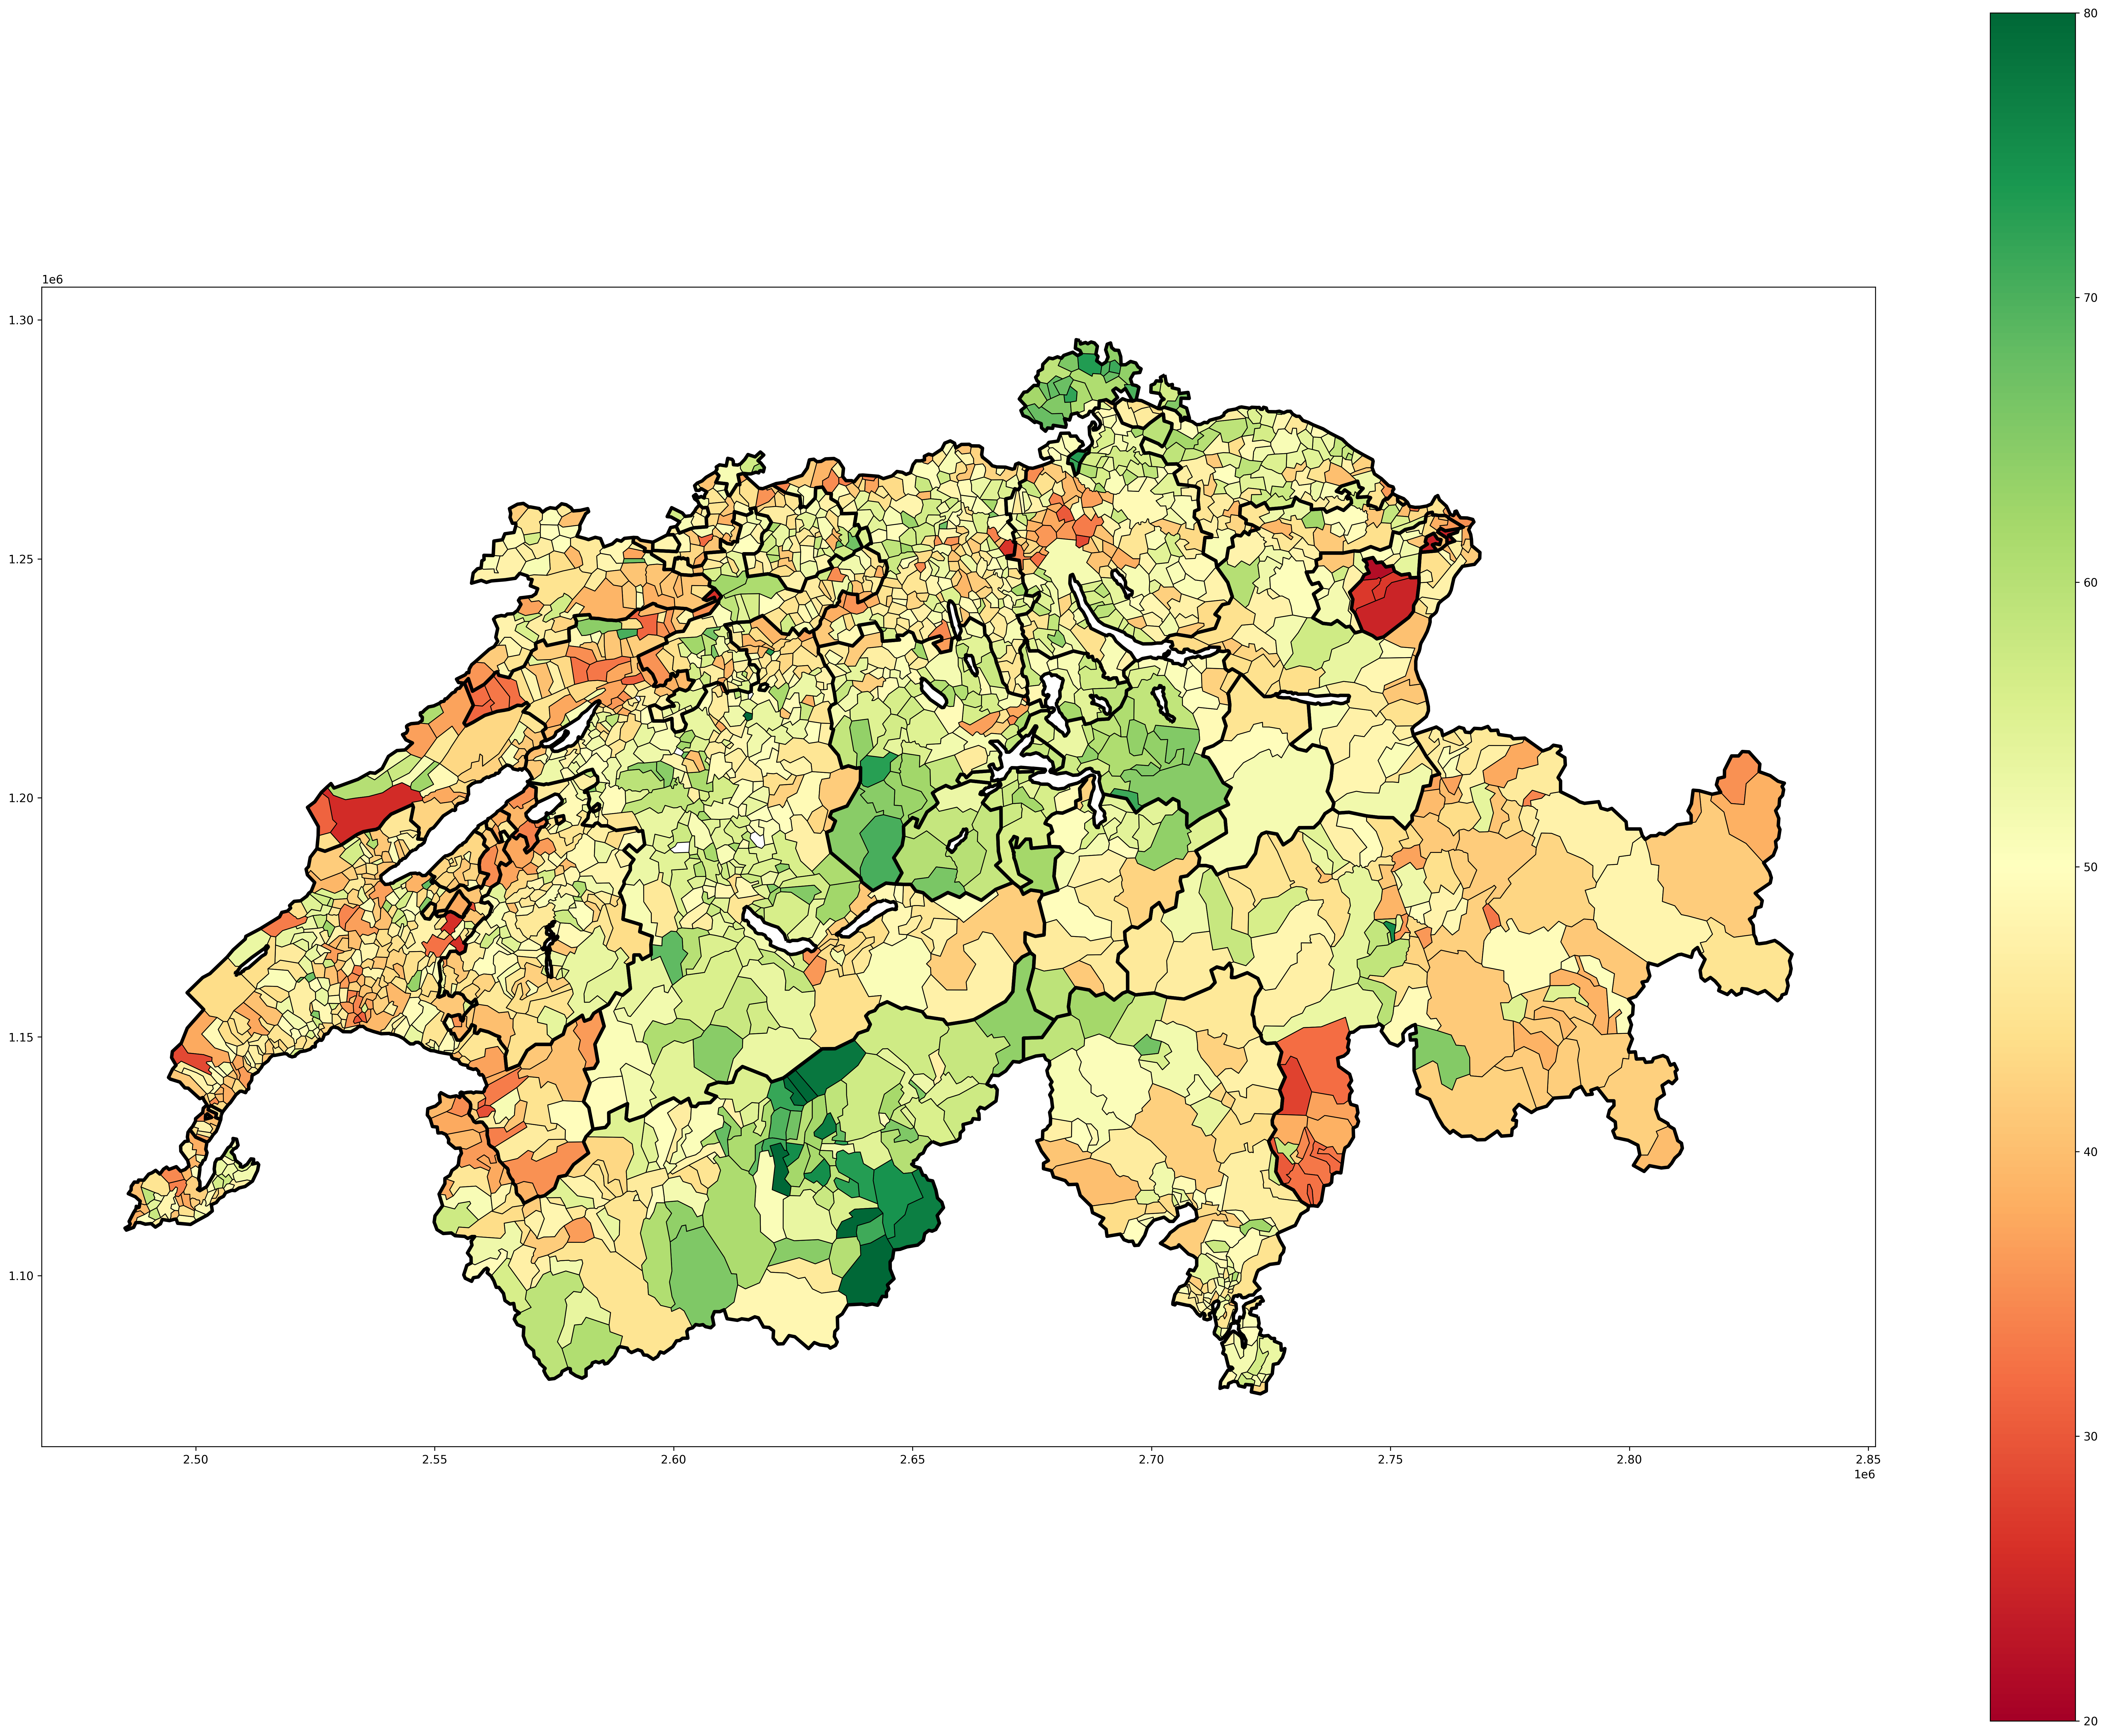

In [32]:
# Create figure and axis
f, ax = plt.subplots(figsize=(36, 27), dpi=300)
map_gemeinde.plot(column="wahlbeteiligung", ax=ax, linewidth=0.75, edgecolor='black', cmap='RdYlGn', legend=True, vmin=20, vmax=80)
map_kanton.plot(ax=ax, linewidth=3, edgecolor='black', color=(0, 0, 0, 0))

In [9]:
data_canton = data_canton.rename(columns= {'kanton_bezeichnung': 'KTNAME'})
map_kanton = map_kanton.merge(data_canton, on="KTNAME")

<Axes: >

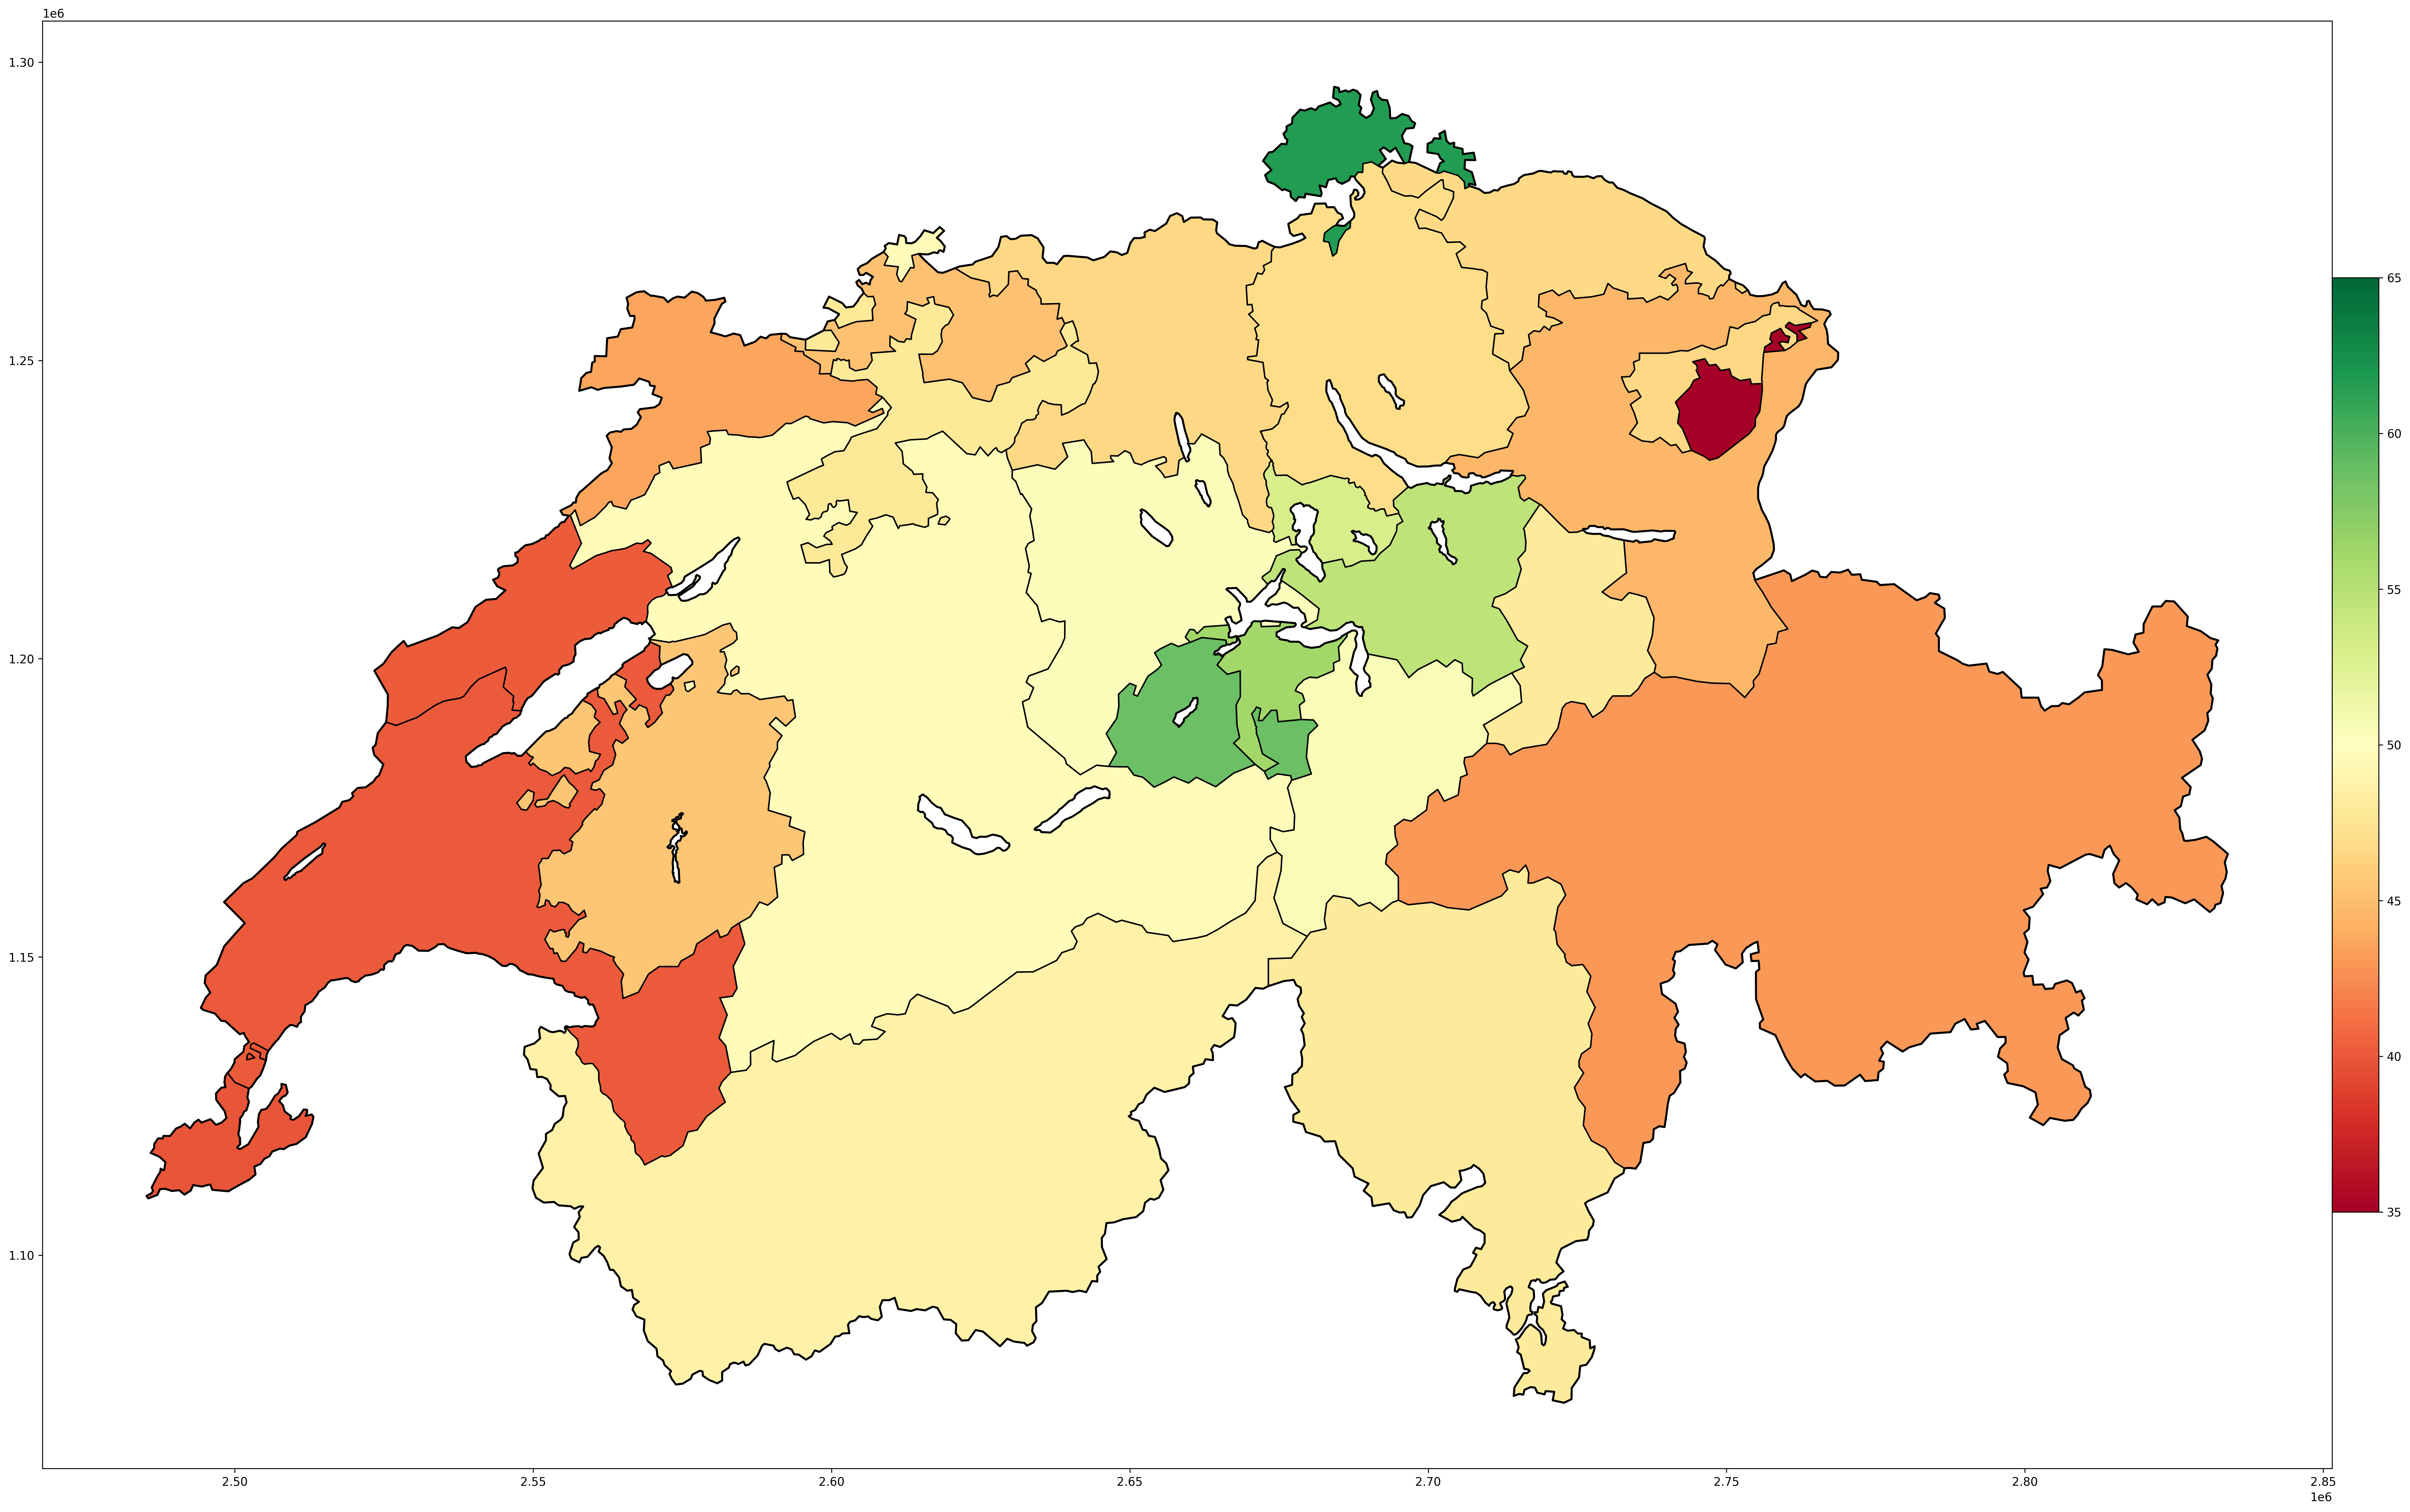

In [38]:
# Create figure and axis
f, ax = plt.subplots(figsize=(36, 27), dpi=300)
map_kanton.plot(column="wahlbeteiligung", ax=ax, linewidth=1.25, edgecolor='black', cmap='RdYlGn', legend=True, vmin=35, vmax=65, legend_kwds={'location': 'right', 'orientation': 'vertical', 'fraction': 0.02, 'pad': 0})
map_land.plot(ax=ax, linewidth=1.75, edgecolor='black', color=(0, 0, 0, 0))
